In [1]:
using Causality, IntervalUnionArithmetic, Plots

# Generation of Epidemics

In [2]:
using SparseArrays, IndexedGraphs
T, N = 20., 100
#G = Causality.makeBarabasi(N,k=2)
ρ = 2.2/N
#G = Causality.makeGNP(N,ρ)
G = Causality.makeProximity(N,ρ)
#=A = spdiagm(1=>[i%2 for i=1:N-1], -1=>[i%2 for i=1:N-1])
A = spdiagm(1=>[i%20 for i=1:N-1], -1=>[i%20 for i=1:N-1])
G = IndexedBiDiGraph(dropzeros!(A))=#

{100, 586} directed sparse Int64 graph
⠀⡠⠀⠄⠄⠀⡀⢑⢀⠁⠀⠅⠀⠈⠀⠀⠀⠀⢢⠂⠀⠄⠈⠀⠤⠀⠡⠀⢁⠢⠂⠀⢀⠀⠄⠂⠀⠀⠠⠀
⠀⠄⡠⠊⠴⠀⠀⠀⠀⠀⠀⠄⠀⡀⠄⠀⠀⡁⠀⠀⠀⠄⠀⠀⠤⡀⢨⠀⠀⠠⠠⠀⠀⠀⠆⠀⠈⠀⠰⠰
⠀⠁⠐⠃⠀⠀⠠⠀⠀⠠⠄⠁⡀⠄⢀⠀⠀⠠⠀⠄⠤⠀⣀⠠⠐⠀⠀⡀⠀⠀⠀⠀⠀⠀⠒⠀⡀⠄⡐⠐
⢄⢈⠀⠀⠀⠂⡀⠈⠀⠀⠀⠀⠀⠢⠀⠄⠀⠐⠀⠂⠔⠀⠀⠠⠀⠠⠀⠀⠌⠀⠀⠀⠈⠠⠠⡁⠠⠂⠐⠄
⠄⠐⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠐⠀⠀⠀⠀⠀⠀⠠⢀⠠⠠⠄⠀⠀⠄⠠⠴⠀⠐⠀⠠⠀⠀⠀⠀⡈⠀⠂
⠄⠄⠀⠄⠄⠁⠀⠀⠀⠀⠀⠀⠀⠠⠀⡀⠀⠈⠀⠁⠁⠄⠠⠈⠤⠀⠠⠀⠀⢀⢀⠀⡀⠠⠀⠀⢀⠀⠠⠀
⡀⠀⠀⠠⠀⠌⠠⡀⠐⠀⠀⡀⠀⠀⠈⠀⠠⠀⠀⠀⠠⠀⢉⠀⠀⠄⠀⠡⠂⠀⠐⠔⠠⠄⢀⠀⠐⠄⠀⠂
⠀⠀⠀⠁⠀⠐⠀⠄⠀⠀⠀⠠⠂⠀⢀⠐⠀⠀⠀⠀⢔⠁⠂⠠⢉⠠⠈⠂⢀⠨⠨⠀⠄⠠⢀⠀⠠⠀⠀⠀
⠀⠀⠄⠠⠀⡀⢀⠀⠀⠀⡀⠀⠀⠂⠀⠀⠠⠂⠀⡀⠀⠀⠀⠀⠀⠂⠠⠰⠀⠀⠈⠎⠀⠂⠀⠰⠦⠀⠆⠀
⠨⠒⠀⠀⠀⠄⠠⠀⠀⡀⠄⠀⠀⠀⠀⠀⠀⠠⠄⠁⠄⢀⠀⡠⠀⠀⠀⢀⠀⠄⠅⠀⠀⠀⠂⠄⠀⠀⠸⠀
⠀⠄⠀⠄⠀⠃⠐⠁⠀⡐⠁⠄⠀⠂⠔⠑⠀⠀⠀⢁⠀⠀⠀⡈⠴⠀⠠⢀⠐⠠⠀⠀⠀⠈⠐⠀⠀⠂⠀⠀
⠂⠀⠀⠀⠀⡘⠀⡀⠀⠆⡀⠂⠃⠐⠈⡀⠀⠀⠀⡠⡀⠠⠊⠀⠀⠀⠀⠃⠀⠀⠀⠀⠀⢐⠀⠀⠃⠀⢑⠀
⠀⠃⠀⠣⠐⠀⠀⡀⠀⠀⠀⠃⠀⠄⠃⡐⠠⠀⠀⠀⠐⠃⠀⠀⠊⠀⠘⠠⠐⠘⠐⠄⠀⢄⠐⠀⠀⠀⠀⠐
⠁⠂⠂⠒⠀⠠⠀⠀⠀⡁⠀⠂⠄⡀⠢⠀⢀⡂⠀⢀⠀⢂⠤⠀⠒⡀⠀⠀⠉⠐⠐⡂⠈⡀⠀⠀⡐⠀⠀⠁
⠡⡐⠀⡀⠀⠀⠂⠁⠐⠃⠀⢀⠈⠀⡀⡐⠀⠀⠀⠄⠐⡀⠀⠀⣐⠀⢃⠀⠊⠀⢄⠀⡘⠀⠐⠄⠀⠀⠀⠑
⠈⠀⠀⠂⠀⠀⠀⠀⠐⠀⠀⠐⢐⠄⠂⠂⡢⠄⠁⠁⠀⠀⠀⠀⠐⠄⠰⠠⠀⠑⢀⠐⠂⠄⠀⢰⢄⠀⡄⠂
⠀⠐⠀⠀⠀⠀⠂⡀⠀⠂⠀⡈⠀⠆⠀⡁⠠⠀⠀⠀⡀⠀⢀⢀⠀⢄⠂⠠⠒⠈⠈⠄⠐⠀⠀⠀⠈⠀⢀⠀
⠠⠁⠈⠁⠘⠀⠄⠢⠀⠀⠀⠀⠀⠐⠀⠐⢀⡀⠈⠄⠐⠀⠀⠀⠐⠀⠀⠀⠐⠄⢀⣀⠀⠀⠀⠀⣐⠀⡈⠘
⠀⠀⠂⠀⠀⠌⠠⠂⡀⠠⠀⠐⠐⠄⠀⠂⠈⠃⠀⠀⠠⠀⠉⠀⠀⠀⠐⠈⠀⠀⠀⠑⠂⠀⠐⠘⠀⠀⠁⠂
⠀⠂⢐⡂⢐⠈⠐⠄⠠⠀⠀⠂⠠⠀⠀⠀⠈⠁⠒⠂⠀⠀⠑⠐⢀⠀⠄⠀⢄⠀⠠⠉⠀⠐⣂⠈⠡⠀⢀⠐

In [3]:
getpargen(pseed, autoinf::GaussianRate, inf_out::GaussianRate, lat_gen::GaussianRate, rec_gen::GaussianRate) = 
    [pseed autoinf.a autoinf.b autoinf.c inf_out.a inf_out.b inf_out.c lat_gen.a lat_gen.b lat_gen.c rec_gen.a rec_gen.b rec_gen.c]

getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate, latency::GaussianRate, recov::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
     fill(latency.a, 1, N); fill(latency.b, 1, N); fill(latency.c, 1, N);
     fill(recov.a, 1, N); fill(recov.b, 1, N); fill(recov.c, 1, N)
    ]

getparSI(pseed,autoinf::GaussianRate,inf_in::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
    ]

getpargenSI(pseed, autoinf::GaussianRate, inf_out::GaussianRate) = 
    [pseed autoinf.a autoinf.b autoinf.c inf_out.a inf_out.b inf_out.c]



getpargenSI (generic function with 1 method)

In [4]:
#Initialize generation parameters
ε = 1e-10
λ = 0.3

pseed = 1/N
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
latency = GaussianRate(1., T/2, 1/ε)
recov = GaussianRate(1., T/2, 1/ε)

inf_out = GaussianRate(λ, T/2, 1/ε)
l_delay = GaussianRate(0.5, T/2, 1/ε)
r_delay = GaussianRate(0.1, T/2, 1/ε)


#=inf_out = GaussianRate(λ, T/2, 2T)
l_delay = GaussianRate(0.57, 8., 5.)
r_delay = GaussianRate(0.23, 18., 10.)=#

θp = getpar(pseed, autoinf, inf_in, latency, recov);
θpgen = getpargen(pseed, autoinf, inf_out, l_delay, r_delay);

In [5]:
const Igauss = GaussianInferentialSEIR
const Igen = GenerativeSEIR{GaussianRate,GaussianRate,GaussianRate,GaussianRate} 

GenerativeSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate}

In [25]:
Mp = StochasticModel(Igen, T, θp, G, θpgen);
sample! = Sampler(Mp);
xtrue = zeros(N,3)
ni = 0
trials = 1000
for st=1:trials
    sample!(xtrue)
    ni += sum(xtrue[:,1] .< T)
end
ni/trials/N

0.5960799999999999

0.62


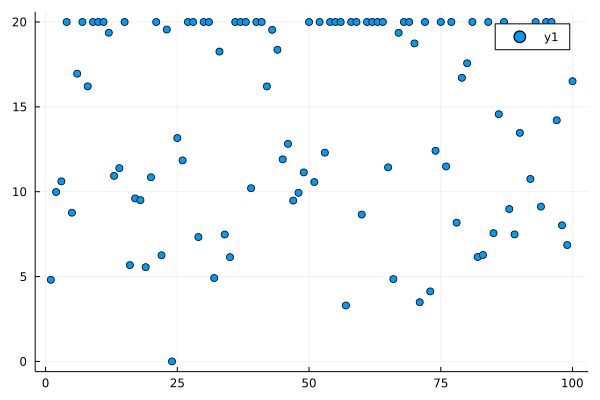

In [7]:
sample!(xtrue)
nobs, p = 10, 1e-6
println(sum(xtrue[:,1] .< T)/N)
O = [(ti = T ; i=rand(1:N); (i,xtrue[i,1] < ti ,ti,p)) for r=1:nobs]
scatter(xtrue[:,1])

## Inference with Causality (SEIR)

In [237]:
#Initialize min/max boundaies
T = Float64(T)
pseed_min = 1e-4
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

θmin = getpar(pseed_min , rate_min, rate_min, rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max, rate_max, rate_max);


rate_min = GaussianRate(ε  ,  0.,   ε)
rate_max = GaussianRate(1/ε  ,  T,   T)

θgenmin = getpargen(pseed_min, rate_min, rate_min, rate_min, rate_min);
θgenmax = getpargen(pseed_max, rate_max, rate_max, rate_max, rate_max);


#Softened model
T = Float64(T)
ε = 1e-3
autoinf = GaussianRate(ε, T/2, T/2)

θp2gen = getpargen(pseed, autoinf, inf_out, l_delay, r_delay);

θp2 = getpar(pseed, autoinf, inf_in, latency, recov);
Mp2 = StochasticModel(Igen, T, θp2, G, θp2gen);

In [238]:
#Initialize the parameters to learn

autoinf = GaussianRate(2e-3, T/2, 2T)
inf_in = GaussianRate(1.0, T/2, 2T)
latency = GaussianRate(1., T/2, 2T)
recov = GaussianRate(1., T/2, 2T)


θ = getpar(pseed, autoinf, inf_in,  latency, recov);
M = StochasticModel(Igauss, T, θ, G, θp2gen);

In [239]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
descend!(Mp2, O; M=M, numsamples=1000, numiters=100, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.1),
         hyperdescender=SignDescender(0.1),hyper_mask=[1,3,4,8,9,10,11,12,13]);
descend!(Mp2, O; M=M, numsamples=1000, numiters=30, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.02),
         hyperdescender=SignDescender(0.02),hyper_mask=[1,3,4,8,9,10,11,12,13]);



Progress: 100%|█████████████████████████████████████████| Time: 0:00:53
  F:  8.25004197992879


In [240]:
rate_inf = M.θgen[5]
rate_lat = M.θgen[8]
rate_rec = M.θgen[11]

0.1

In [241]:
statscauSEIR = prior(M);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


## Inference with Causality (SI)

In [242]:
const IgenSI = GenerativeSI{GaussianRate,GaussianRate} 
const IgaussSI = GaussianInferentialSI

#inf_max = GaussianRate(1., 2T, 1/ε) 
θmin = getparSI(pseed_min , rate_min, rate_min);
θmax = getparSI(pseed_max , rate_max, rate_max);

ε = 1e-10
rate_min = GaussianRate(ε  ,  0.,   ε)
rate_max = GaussianRate(1/ε  ,  T,   T)

θgenmin = getpargenSI(pseed_min, rate_min, rate_min);
θgenmax = getpargenSI(pseed_max, rate_max, rate_max);


#Softened model
T = Float64(T)
ε = 1e-3
autoinf = GaussianRate(ε, T/2, T/2)

θp2gen = getpargenSI(pseed, autoinf, inf_out);

θp2 = getparSI(pseed, autoinf, inf_in);
Mp2SI = StochasticModel(IgenSI, T, θp2, G, θp2gen);

In [243]:
#Initialize the parameters to learn

#autoinf = GaussianRate(1/(N*T), T/2, 2T)
inf_in = GaussianRate(1.0, T/2, 2T)


θ = getparSI(pseed, autoinf, inf_in);
MSI = StochasticModel(IgaussSI, T, θ, G, θp2gen);

In [244]:
MSI.θgen

1×7 Matrix{Float64}:
 0.01  0.001  10.0  10.0  0.3  10.0  1.0e10

In [245]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
descend!(Mp2SI, O; M=MSI, numsamples=1000, numiters=100, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.1),
         hyperdescender=SignDescender(0.1),hyper_mask=[1,3,4]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:57
  F:  9.895420364639122


In [246]:
descend!(Mp2SI, O; M=MSI, numsamples=1000, numiters=30, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.02),
         hyperdescender=SignDescender(0.02),hyper_mask=[1,3,4]);
MSI.θgen

Progress: 100%|█████████████████████████████████████████| Time: 0:00:16
  F:  8.642446323927736


1×7 Matrix{Float64}:
 0.01  0.00265432  10.0  10.0  0.0610626  10.98  9.69145

In [247]:
statscauSI = prior(MSI);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


In [248]:
Mp.θgen[5]

0.3

In [249]:
MSI.θgen[5]

0.061062646875021644

In [250]:
M.θgen[5]

0.004150258514227797

## Check of Hyperparameters
we now see if the hyperparameters found are consistent with the prior distribution

## Marginals and ROC curve

In [251]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum( stats[:,i,1] .< t ) / numsamp
end

function marginalSI(i, t, stats)
    numsamp = size(stats,1)
    sum( stats[:,i] .< t ) / numsamp
end


function tpr(xtrue, rank) 
    den = sum(xtrue[rank])
    if den != 0
        return cumsum(xtrue[rank]) ./ den
    else
        return ones(size(rank))
    end
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

In [252]:
O

10-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (37, 1, 20.0, 1.0e-6)
 (61, 0, 20.0, 1.0e-6)
 (100, 0, 20.0, 1.0e-6)
 (7, 0, 20.0, 1.0e-6)
 (97, 0, 20.0, 1.0e-6)
 (90, 1, 20.0, 1.0e-6)
 (45, 0, 20.0, 1.0e-6)
 (29, 0, 20.0, 1.0e-6)
 (90, 1, 20.0, 1.0e-6)
 (83, 0, 20.0, 1.0e-6)

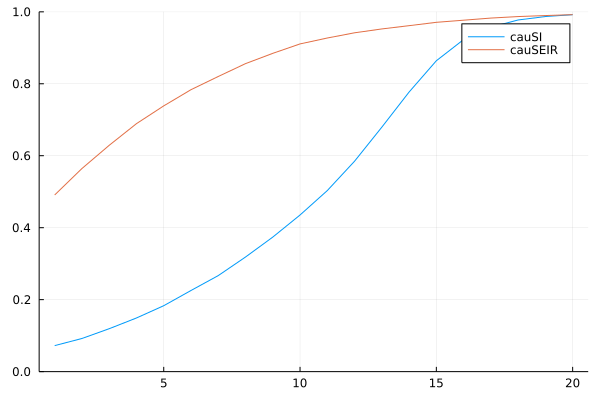

In [261]:
using Plots
p_cauSEIR = zeros(N,Int(T))
p_cauSI = zeros(N,Int(T))
for i = 1:N
    for t = 1:Int(T)
       p_cauSEIR[i,t] = marginal(i, t, statscauSEIR)
       p_cauSI[i,t] = marginalSI(i, t, statscauSI)
    end
end
i = 90
plot(p_cauSI[i,1:end], label = "cauSI")
plot!(p_cauSEIR[i,1:end], label = "cauSEIR")
#savefig("SEIRmarkov.pdf")
ylims!(0,1)

In [254]:
sortperm(p_cauSI[:,end],rev=true)

100-element Vector{Int64}:
  90
  11
  37
  66
  12
  18
  87
   6
  71
  26
  94
  42
  84
   ⋮
  80
  75
  22
  74
  33
 100
  83
  61
  97
  29
  45
   7

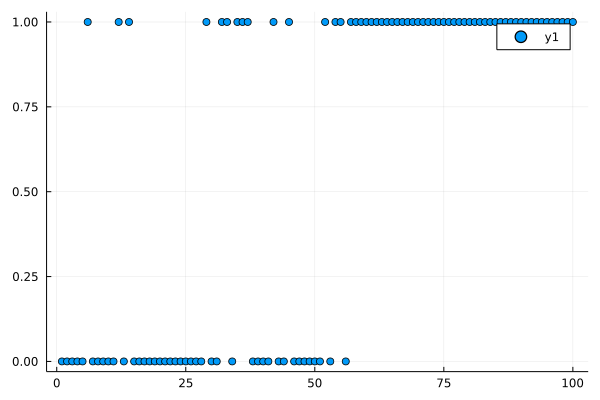

In [255]:
scatter(xtrue[sortperm(p_cauSI[:,end],rev=true),1] .== T)

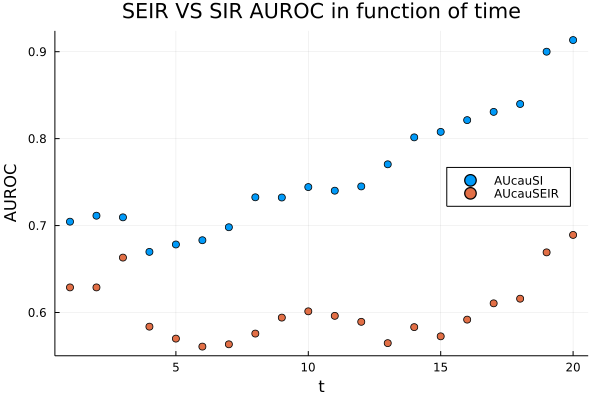

In [256]:
T = Int(T)
AU_cauSEIR=zeros(T)
AU_cauSI=zeros(T)
for t = 1:T
    cauSEIR_risk=zeros(N)
    cauSI_risk=zeros(N)
    for i=1:N
       cauSEIR_risk[i] = marginal(i,t,statscauSEIR)
       cauSI_risk[i] = marginalSI(i,t,statscauSI)
    end
    xt = xtrue[:,1] .< t-1e-3 
    AU_cauSEIR[t] = AUROC(ROC(xt, cauSEIR_risk))
    AU_cauSI[t] = AUROC(ROC(xt, cauSI_risk))
end

scatter(LinRange(1,T,T),AU_cauSI, label="AUcauSI",legend=:right)
scatter!(LinRange(1,T,T),AU_cauSEIR, label="AUcauSEIR", title="SEIR VS SIR AUROC in function of time")

T = Float64(T)
#ylims!(0.5,1.05)
#savefig("SierologicalAUROC")
xlabel!("t")
ylabel!("AUROC")

In [378]:


pseed = 1/N
ε = 1e-10
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
latency = GaussianRate(1., T/2, 1/ε)
recov = GaussianRate(1., T/2, 1/ε)

T = Float64(T)
pseed_min = 1e-4
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

θmin = getpar(pseed_min , rate_min, rate_min, rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max, rate_max, rate_max);


rate_min = GaussianRate(ε  ,  0.,   ε)
rate_max = GaussianRate(1/ε  ,  T,   T)

θgenmin = getpargen(pseed_min, rate_min, rate_min, rate_min, rate_min);
θgenmax = getpargen(pseed_max, rate_max, rate_max, rate_max, rate_max);


θp2 = getpar(pseed, autoinf, inf_in, latency, recov);

latency = GaussianRate(1., T/2, 2T)
recov = GaussianRate(1., T/2, 2T)

l_delay = GaussianRate(100., T/2, 2T)
r_delay = GaussianRate(0.01, T/2, 2T)


θemb=getpar(pseed, autoinf, inf_in, latency, recov)
θemb[[1,2,3,4,5,6,7],:] .= MSI.θ

θgenemb=getpargen(pseed, autoinf, inf_out, l_delay, r_delay)
θgenemb[[1,2,3,4,5,6,7]] = MSI.θgen

Memb = StochasticModel(Igauss, T, θemb, G, θgenemb);
Mp2 = StochasticModel(Igen, T, θp2, G, θgenemb);
descend!(Mp2, O; M=Memb, numsamples=1000, numiters=100, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.02),
       hyperdescender=SignDescender(0.02),hyper_mask=[1,3,4]);

Progress: 100%|█████████████████████████████████████████| Time: 0:02:39
  F:  7.950505816557817


In [379]:
[θgenemb[5] MSI.θgen[5]]

1×2 Matrix{Float64}:
 0.0622963  0.0610626

θ number of infected

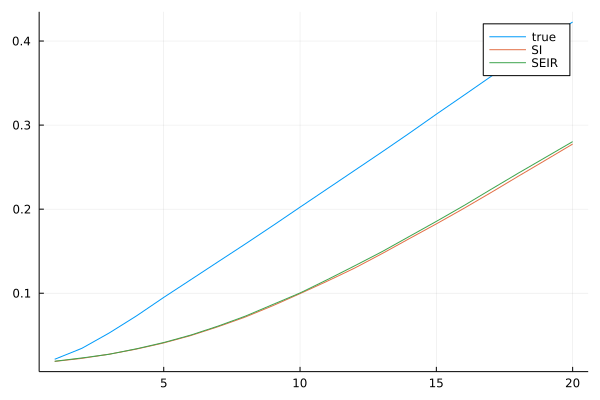

In [ ]:
trials = 1000
xSI = zeros(N)
xSEIR = zeros(N, Int(T))
xorig = zeros(N,Int(T))
sampleSI! = Sampler(Mp2SI)
sampleSEIR! = Sampler(Mp2)
ni_orig = zeros(Int(T))
ni_SEIR = zeros(Int(T))
ni_SI = zeros(Int(T))
ni_planted = zeros(Int(T))
for st = 1:trials
    sampleSI!(xSI)
    sample!(xorig)
    sampleSEIR!(xSEIR)
    for t = 1:Int(T)
        ni_orig[t] += sum(xorig[:,1] .< t)
        ni_SEIR[t] += sum(xSEIR[:,1] .< t)
        ni_SI[t] += sum(xSI .< t)
        ni_planted[t] = sum(xtrue[:,1] .< t)
    end
end
plot(ni_orig./trials/N,label="true")
plot!(ni_SI./trials/N,label="SI")
plot!(ni_SEIR./trials/N,label="SEIR")
#plot!(ni_planted/N,label="planted")